# Churn Analysis with POO (Python Object-Oriented Programming)
This notebook demonstrates how to perform churn analysis using Python's object-oriented programming (POO) principles. We will create a class to encapsulate the data loading, preprocessing, and analysis steps.

In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

## ChurnPredictor Class
This class encapsulates the entire churn analysis process, including data loading, preprocessing, model training, and evaluation.

In [5]:
class ChurnPredictor:
    def __init__(self, file_path):
        self.file_path = file_path
        self.pipeline = None
        self.X = self.y = None
        self.X_train = self.X_test = self.y_train = self.y_test = None
        self.y_pred = self.y_pred_proba = None
        self.cat_features = []
        self.num_features = []

    def load_and_prepare_data(self, target_column, drop_columns=[]):
        """
        Load and prepare the dataset for analysis.
        :param target_column:
        :param drop_columns:
        :return:
        """
        df = pd.read_csv(self.file_path)
        df.drop(columns=drop_columns, inplace=True)
        self.X = df.drop(columns=target_column)
        self.y = df[target_column]

        self.cat_features = self.X.select_dtypes(include=['object', 'category']).columns.tolist()
        self.num_features = self.X.select_dtypes(include=['int64', 'float64']).columns.tolist()

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        cat_transformer = OneHotEncoder(handle_unknown='ignore')
        num_transformer = StandardScaler()

        preprocessor = ColumnTransformer(transformers=[
                                                       ('cat', cat_transformer, self.cat_features),
                                                       ('num', num_transformer, self.num_features)
        ])

        self.pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('classifier', LogisticRegression(max_iter=1000))])

    def train(self):
        """
        Train the logistic regression model.
        """
        self.pipeline.fit(self.X_train, self.y_train)

    def predict(self):
        """
        Make predictions on the test set.
        """
        self.y_pred = self.pipeline.predict(self.X_test)
        self.y_pred_proba = self.pipeline.predict_proba(self.X_test)[:, 1]

    def evaluate(self):
        """
        Evaluate the model's performance.
        """
        accuracy = accuracy_score(self.y_test, self.y_pred)
        conf_matrix = confusion_matrix(self.y_test, self.y_pred)
        class_report = classification_report(self.y_test, self.y_pred)
        fpr, tpr, thresholds = roc_curve(self.y_test, self.y_pred_proba, pos_label=1)
        roc_auc = auc(fpr, tpr)

        return accuracy, conf_matrix, class_report, fpr, tpr, thresholds, roc_auc

    def plot_confusion_matrix(self, conf_matrix):
        """
        Plot the confusion matrix.
        :param conf_matrix: Confusion matrix to plot.
        """
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    def plot_roc_curve(self, fpr, tpr, roc_auc):
        """
        Plot the ROC curve.
        :param fpr: False positive rate.
        :param tpr: True positive rate.
        :param roc_auc: Area under the ROC curve.
        """
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    def save_model(self, file_path='./data/churn_model.pkl'):
        """
        Save the trained model to a file.
        :param file_path: Path to save the model.
        """
        joblib.dump(self.pipeline, file_path)

    def load_model(self, file_path='./data/churn_model.pkl'):
        """
        Load a trained model from a file.
        :param file_path:
        """
        self.pipeline = joblib.load(file_path)

## Example Usage
This section demonstrates how to use the `ChurnPredictor` class to perform churn analysis.

Accuracy: 0.82
Confusion Matrix:
 [[939  97]
 [151 222]]
Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.91      0.88      1036
         Yes       0.70      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



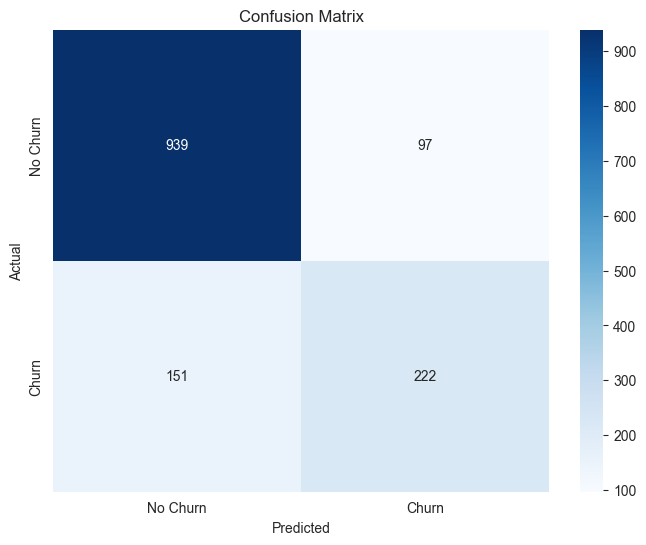

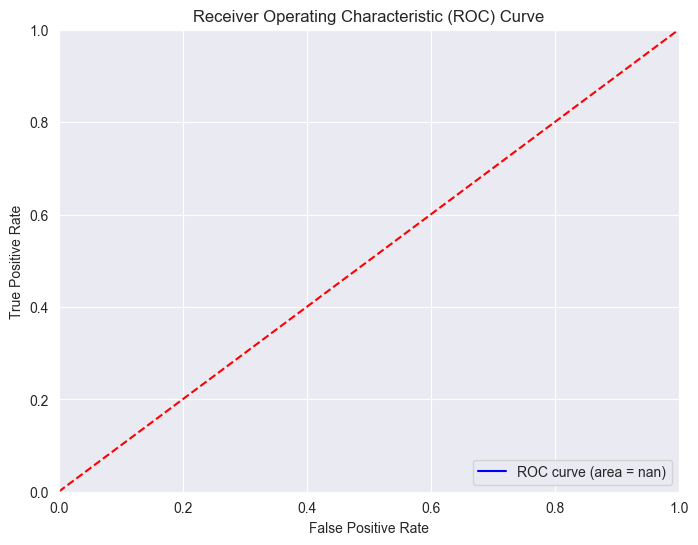

In [8]:
# Example usage of the ChurnPredictor class
churn_predictor = ChurnPredictor('./data/churn_data.csv')
churn_predictor.load_and_prepare_data(target_column='Churn', drop_columns=['customerID'])
churn_predictor.train()
churn_predictor.predict()
accuracy, conf_matrix, class_report, fpr, tpr, thresholds, roc_auc = churn_predictor.evaluate()
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
churn_predictor.plot_confusion_matrix(conf_matrix)
churn_predictor.plot_roc_curve(fpr, tpr, roc_auc)
churn_predictor.save_model()

# Interactive Usage
You can also interactively use the `ChurnPredictor` class in a Jupyter Notebook or Python script. Simply create an instance of the class, load your data, train the model, and evaluate it as shown in the example usage section above. The class methods provide a clean interface for performing all necessary steps in the churn analysis process.